<a href="https://colab.research.google.com/github/sillHD/CuadernosSyS/blob/main/Taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOLUCION TALLER

Ismael Cortes Ramirez

Señales y Sistemas

## EJERCICIO 2.1

Semejanzas:

- en ambas se usan las funciones sen y cos para la representacion de las señales y los respectivos calculos que se tengan que realizar con ellas

- en ambas se descomponen un señal en sus componentes frecuenciales

- en ambas se cumplen las propiedades de linealidad

- en ambas se analiza en tienmpo continuo

Diferencias:

- en la serie de fourier se analiza sobre un segmento finito, por otro lado en la transformada se analiza sobre segmento infinito

- en la serie de fourier se analiza en espectro en frecuencia discreto, por otro lado en la tranformada se analiza en espectro en frecuencia continuo

- en la serie de fourier el tipo de coeficientes va a variar dependiendo si es exponencial, trigonometrica o compacta, por otro lado la tranformada entrega un espectro continuo de amplitudes y fases en el dominio de la frecuencia

###Transformada discreta de Fourier y transformada rápida de Fourier (semejanzas)

- tanto para la serie de Fourier, como para la transformada (continua y discreta en tiempo), se require de la resolución analítica de integrales y de la suposicion de intervalos infinitos en tiempo y frecuencia

- las dos tienen un espectro periodico en el dominio de la frecuencia

- las dos tienen una transformada inversa que permite reconstruir la señal original

Diferencias:

- La DTFT se aplica a señales infinitas en el dominio discreto mientras que la DFT se aplica a señales de duracion finita

- en la DTFT el dominio frecuencial es discreto, pero el dominio frecuencial es continuo, por otro lado, en el DFT tanto el dominio temporal como frecuencial son discretos

tiempo continuo, espectro continuo: transformada de fourier

tiempo continuo, espectro discreto: serie de fourier

tiempo discreto, espectro continuo: transformada de fourier en tiempo discreto

tiempo discreto, espectro discreto: transformada discreta de fourier

el algoritmo FFT se usa para calcular la DFT de una señal de forma eficiente, aunque conceptualmente la DFT y FFT son equivalentes, el FFT reduce considerablemente el costo operacional, este algoritmo descompone la señal en partes mas pequeñas y calula las transformadas de estas partes recursivamente

## EJERCICIO 2.4

THD: es una medida que indica el grado o que tanto se ve afectada una señal por la presencia de armonicos en relacion con el componente fundamental de la señal, se debe tener en cuenta que altos valores de THD pueden provocar ineficiencia y problemas en dispositivos electricos

Factor de potencia: es una medida que indica la eficiencia con la que un circuito utiliza la energia que recibe de una fuente de alimentacion

Para poder calcular el THD por medio de la FFT se debe primero realiza la transformada FFT sobre la señal para asi obtener los valores de las amplitudes de las componentes armonicas, luego debemos identificar el valor de la componente fundamental, seguido de esto se debe sumar las potencias de los armonicos desde el segundo componente hasta el orden que queremos, por ultimo aplicamos la formula de THD

## EJERCICIO 2.5
la modulacion por amplitud es una tecnica en la cual la amplitud de una portadora sinusoidal de alta frecuencia varia de acuerdo con la amplitud de una señal mensaje de baja frecuencia.

la deteccion coherente es un metodo para demodular señales de tipo AM que requieren un oscilador local en el recepto sincronizado en frecuencia y fase con la portadora original

Aplicaciones:

- es ampliamente utilizada en emisoras de radio comerciales

- en sistemas donde es posible mantener la sincronizacion entre emisor y receptor

- en pruebas y diagnositicos donde se requiere construir señales moduladas con alta fidelidad

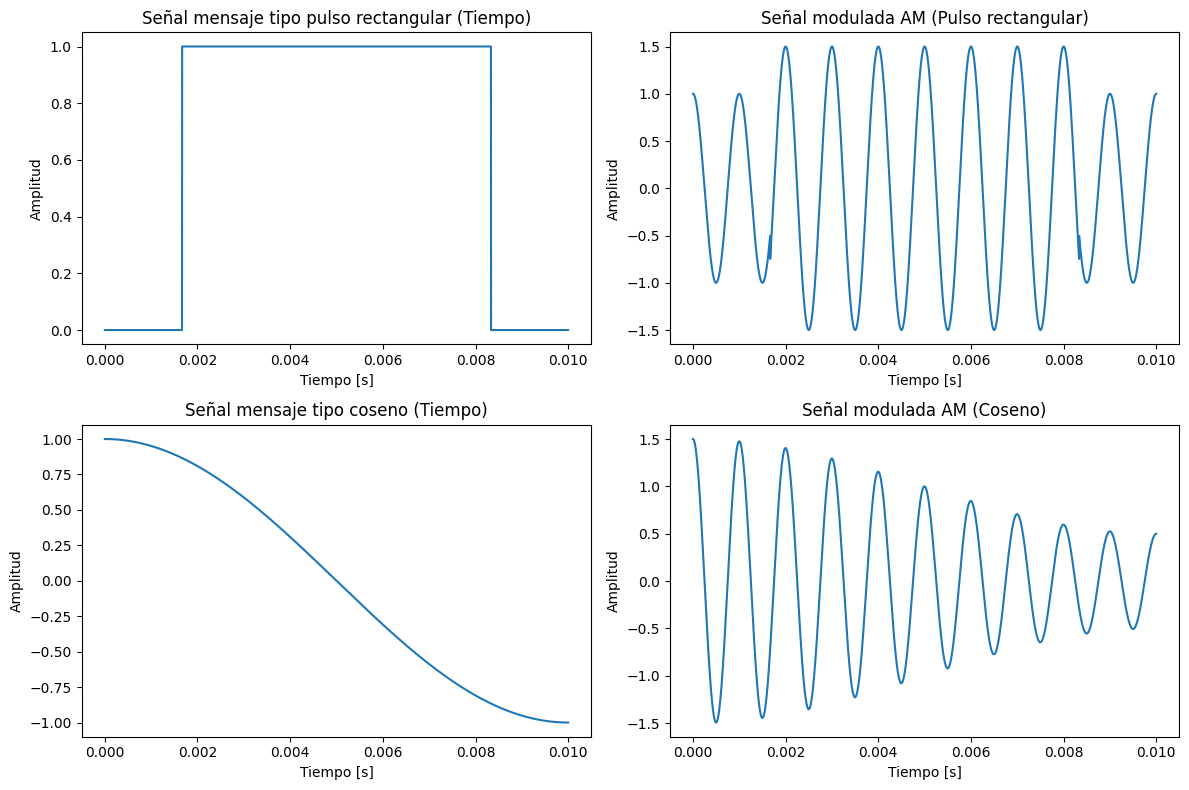

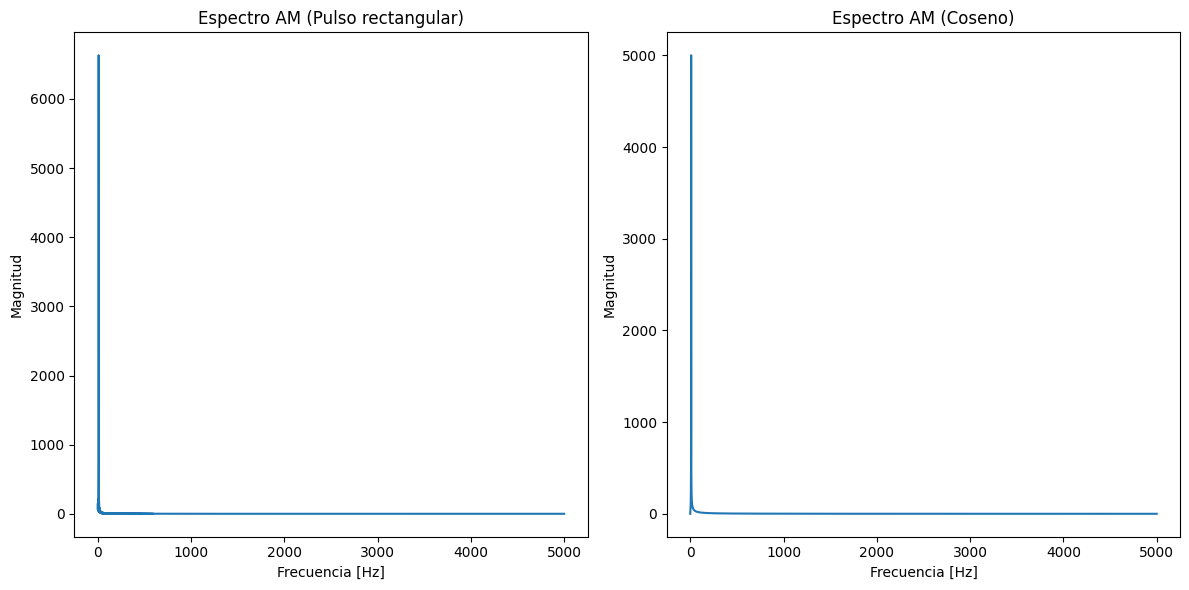

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

# Parámetros de la simulación
fs = 10000  # Frecuencia de muestreo en Hz
t = np.linspace(0, 0.01, fs, endpoint=False)  # Vector de tiempo
fc = 1000  # Frecuencia de la portadora en Hz
Am = 1  # Amplitud de la señal mensaje
Ac = 1  # Amplitud de la portadora
modulation_index = 0.5  # Índice de modulación

# Señal mensaje tipo pulso rectangular
mensaje_rect = Am * (np.abs(np.sin(2 * np.pi * 50 * t)) > 0.5).astype(float)

# Señal mensaje tipo coseno
mensaje_cos = Am * np.cos(2 * np.pi * 50 * t)

# Señal modulada AM para ambas señales mensaje
am_rect = (1 + modulation_index * mensaje_rect) * Ac * np.cos(2 * np.pi * fc * t)
am_cos = (1 + modulation_index * mensaje_cos) * Ac * np.cos(2 * np.pi * fc * t)

# Graficar señales en el tiempo
plt.figure(figsize=(12, 8))

# Señal mensaje tipo pulso rectangular
plt.subplot(2, 2, 1)
plt.plot(t, mensaje_rect)
plt.title("Señal mensaje tipo pulso rectangular (Tiempo)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

# Señal modulada AM con pulso rectangular
plt.subplot(2, 2, 2)
plt.plot(t, am_rect)
plt.title("Señal modulada AM (Pulso rectangular)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

# Señal mensaje tipo coseno
plt.subplot(2, 2, 3)
plt.plot(t, mensaje_cos)
plt.title("Señal mensaje tipo coseno (Tiempo)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

# Señal modulada AM con coseno
plt.subplot(2, 2, 4)
plt.plot(t, am_cos)
plt.title("Señal modulada AM (Coseno)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

# FFT de las señales moduladas
frequencies = rfftfreq(len(t), 1/fs)
am_rect_fft = np.abs(rfft(am_rect))
am_cos_fft = np.abs(rfft(am_cos))

# Graficar señales en frecuencia
plt.figure(figsize=(12, 6))

# Espectro AM con pulso rectangular
plt.subplot(1, 2, 1)
plt.plot(frequencies, am_rect_fft)
plt.title("Espectro AM (Pulso rectangular)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")

# Espectro AM con coseno
plt.subplot(1, 2, 2)
plt.plot(frequencies, am_cos_fft)
plt.title("Espectro AM (Coseno)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")

plt.tight_layout()
plt.show()
